Epoch 1/30
2/2 [==============================] - 5s 735ms/step - loss: 1.1023 - accuracy: 0.1538 - val_loss: 1.0975 - val_accuracy: 0.4000
Epoch 2/30
2/2 [==============================] - 0s 125ms/step - loss: 1.0914 - accuracy: 0.4872 - val_loss: 1.0979 - val_accuracy: 0.3000
Epoch 3/30
2/2 [==============================] - 0s 142ms/step - loss: 1.0833 - accuracy: 0.6154 - val_loss: 1.0979 - val_accuracy: 0.3000
Epoch 4/30
2/2 [==============================] - 0s 87ms/step - loss: 1.0731 - accuracy: 0.4872 - val_loss: 1.0976 - val_accuracy: 0.3000
Epoch 5/30
2/2 [==============================] - 0s 99ms/step - loss: 1.0642 - accuracy: 0.5128 - val_loss: 1.0942 - val_accuracy: 0.3000
Epoch 6/30
2/2 [==============================] - 0s 78ms/step - loss: 1.0511 - accuracy: 0.4872 - val_loss: 1.0895 - val_accuracy: 0.3000
Epoch 7/30
2/2 [==============================] - 0s 75ms/step - loss: 1.0364 - accuracy: 0.5128 - val_loss: 1.0829 - val_accuracy: 0.3000
Epoch 8/30
2/2 [========

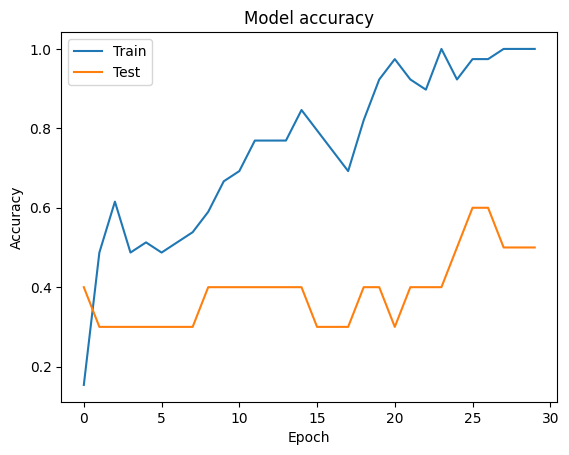

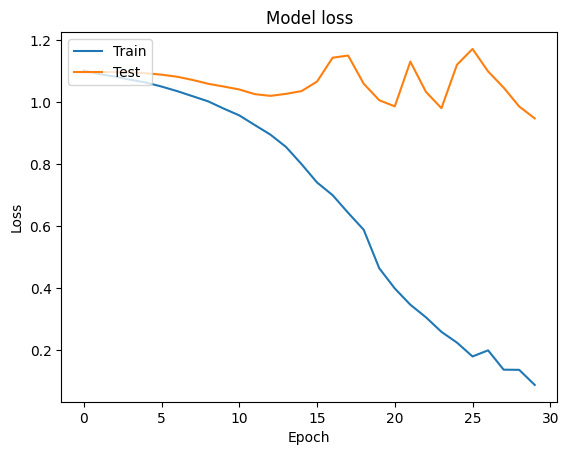

1/1 [==============================] - 0s 276ms/step
Negative: 18.74%
Positive: 80.17%
Neutral: 1.09%


In [13]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


sentences = [
    "I love this product, it is fantastic!",
    "This is the worst movie I have ever seen.",
    "The service was okay, nothing special.",
    "I am very happy with my purchase.",
    "I am disappointed with the quality.",
    "It's just an average experience.",
    "Amazing performance by the lead actor!",
    "I wouldn't recommend this to anyone.",
    "The food was delicious and the service was great.",
    "This product broke after one use.",
    "It's neither good nor bad, just alright.",
    "The book was a pleasant surprise, I enjoyed it a lot.",
    "The customer service was terrible.",
    "The event was well-organized and fun.",
    "I don't think I'll be coming back here again.",
    "It was an okay movie, not the best but not the worst either.",
    "Absolutely fantastic! Exceeded my expectations.",
    "Very poor quality, I'm really disappointed.",
    "The hotel was clean and comfortable.",
    "The wait time was too long.",
    "The presentation was neither exciting nor boring.",
    "Great value for the price, highly recommend!",
    "I'm upset with the service I received.",
    "The software is user-friendly and intuitive.",
    "The app crashes frequently, not reliable at all.",
    "It's a pretty average tool, does what it needs to.",
    "Outstanding job by the team, well done!",
    "The taste was awful, couldn't finish my meal.",
    "The lecture was informative and engaging.",
    "I'm never buying from this store again.",
    "The class was okay, not too difficult but not too easy.",
    "Excellent quality and fast shipping!",
    "The package arrived damaged and late.",
    "It’s a decent place, nothing extraordinary.",
    "Loved the atmosphere and the friendly staff.",
    "The product did not meet my expectations at all.",
    "The trip was fun, though the weather was bad.",
    "The design is sleek and modern, very satisfied.",
    "The fabric feels cheap and uncomfortable.",
    "The course content was satisfactory, covered the basics.",
    "Impressed with the customer support!",
    "Terrible experience, I want a refund.",
    "The meeting was somewhat productive.",
    "Best purchase I've made this year.",
    "The software has too many bugs.",
    "The restaurant ambiance was nice, food was okay.",
    "Wonderful product, will buy again.",
    "The installation process was confusing and hard.",
    "The show was decent, had some good moments.",
]

labels = [1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2]

# Токенізація текстових даних
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Доповнення послідовностей нулями до однакової довжини
maxlen = 20
data = pad_sequences(sequences, maxlen=maxlen)


num_classes = 3
labels = to_categorical(labels, num_classes)


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Побудова LSTM моделі
model = Sequential()
model.add(Embedding(max_words, 128, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


batch_size = 32
epochs = 30

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=1)


score, acc = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

# Відображення результатів тестування
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

def predict_sentiment(text, model, tokenizer, maxlen):
    sequences = tokenizer.texts_to_sequences([text])
    padded_sequences = pad_sequences(sequences, maxlen=maxlen)
    predictions = model.predict(padded_sequences)
    # Перетворення ймовірностей у відсотки
    percentages = predictions[0] * 100
    return percentages

# Приклад використання функції
text = "This is amazing!"
percentages = predict_sentiment(text, model, tokenizer, maxlen)
class_labels = ['Negative', 'Positive', 'Neutral']

for i, label in enumerate(class_labels):
    print(f"{label}: {percentages[i]:.2f}%")

